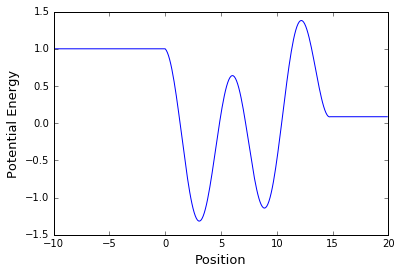

In [2]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

res=0.1
max=int(30/res)


#initialized potential to 1 so that I can skip the first part of the piecewise
U=ones(max)

x=zeros(max)

i=range(0,max)

for j in i:
    x[j]=-10+j*res
    
    #use if statements to represent a piecewise function
    if x[j] > 0 and x[j] < 14.8:
        U[j]= cos(pi*x[j]/3.0) + 0.015*x[j]**2 - 0.15*x[j]
    
    if x[j] >=14.8:
        U[j]=0.087
plt.xlabel('Position', fontsize = 13)
plt.ylabel('Potential Energy',fontsize=13)
        
        
plt.plot(x[i],U[i])
plt.show()



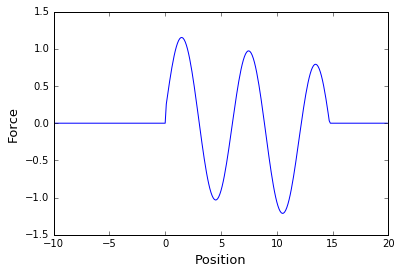

In [3]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

# the force is the negative derivative of the potential
# F = (pi/3)sin((pi/3)x) - 0.030x + 0.15

res=0.1
max=int(30/res)

F=zeros(max)
x=zeros(max)

i=range(0,max)

for j in i:
    x[j]=-10+j*res
    
    #only bother getting force in this section becuase everywhere else it is already zero
    if x[j] > 0 and x[j] <14.8:
        F[j]= (pi/3)*sin(pi*x[j]/3)-0.03*x[j]+.15
        

plt.xlabel('Position', fontsize = 13)
plt.ylabel('Force',fontsize=13)        
        
plt.plot(x[i],F[i])
plt.show()

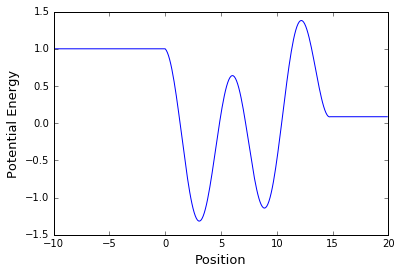

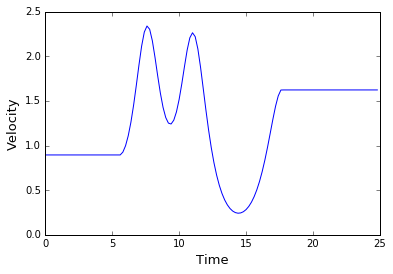

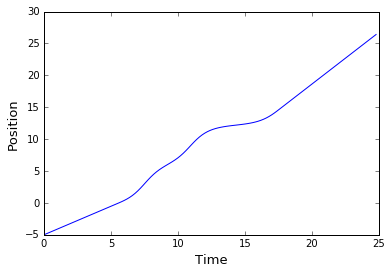

In [7]:
from numpy import *
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
%matplotlib inline

T0=0.4
m=1.0

max=300
maxt=125
dt=0.2

i=range(0,max)

t=zeros(max)
vnum=zeros(max)
xnum=zeros(max)

vnum[0]=sqrt(2.0/m*T0)
xnum[0]=-5
U0=1

if xnum[0] > 0 and xnum[0] < 14.8:
    
    if xnum[0]<=0:
        U0=1
    if xnum[j]>=14.8:
        U0=0.087
    if xnum[0] > 1 and xnum[0] < 14.8:
        U0=(cos(pi*xnum[0]/3))+(0.015*(xnum[0])**2.0)-(0.15*xnum[0])

        
#calculate total E using initial conditions
#we use it later to find the potential because we know the kinetic from velocity
E0=U0 + T0

i=range(1,max)

for j in i:
    #potential same as before
    x[j]=-10+j*res
    
    if x[j] <= 0:
        U[j]= 1
    
    if x[j] > 0 and x[j] < 14.8:
         U[j]= cos(pi*x[j]/3.0) + 0.015*x[j]**2 - 0.15*x[j]
            
    if x[j] >=14.8:
        U[j]=0.087       

#plt.plot(x[i],U[i])

t[0]=0

for j in range(1,maxt):
    t[j]=j*dt
    plt.plot(x[i],U[i])
    F=0
    

  
    #force same as before
    if xnum[j-1]>0 and xnum[j-1]<14.8 :
       
        F= (pi/3)*sin(pi*xnum[j-1]/3) - (0.03*xnum[j-1]) +.15

        
    #equation of motion
    a=F/m
    
    #use a to find new v
    vnum[j]=vnum[j-1]+a*dt
    
    #use v to find new x
    xnum[j]=xnum[j-1]+vnum[j]*dt
    
    #can use v to find kinetic which in turn can be used to find potential
    Unum=E0-0.5*m*vnum[j]*vnum[j]
    
    #plot force and potenial over time, the force always lags behind the potential
    plt.plot(xnum[j],F,marker="o",color="blue")
    plt.plot(xnum[j],Unum,marker="o",color="red")
    
    plt.show()
    time.sleep(0)
    clear_output(True)
    plt.cla()
    
k=range(0,maxt)


plt.xlabel('Position', fontsize = 13)
plt.ylabel('Potential Energy',fontsize=13)
plt.plot(x[i],U[i])
plt.show()

plt.xlabel('Time', fontsize = 13)
plt.ylabel('Velocity',fontsize=13)
plt.plot(t[k],vnum[k])
plt.show()

plt.xlabel('Time', fontsize = 13)
plt.ylabel('Position',fontsize=13)
plt.plot(t[k],xnum[k])
plt.show()
#plt.show()

# C
#A particle released from rest at x=0.5 will get stuck in the potential well, never escaping
#and fluctuating forever

# D
#The velocity graph has two sharp increases in velocity which line up with the potential wells in
#the potential energy graph. Then there is a large decrease in velocity before returning to a 
#velocity higher than the original.This lines up with the final "mountain" in the potential
#energy graph. The velocity is always positive, because it never travelled backwards

#The position graph is continually increasing with a varying slope. This makes sense, as it
#always travels forwards but it's velocity is changing.

# E
#The highest potential energy looks to be somewhere around 1.4, because the inital potential is
#1.0 that means our minimum should be about 0.4

# D
#plugging 0.4 in for our kinetic energy causes the particle to just barely make it over the
#"mountain" before continuing on to infinity, much slower and it would not have made it.
#Because the simulation has a finite resolution it would be hard to get a perfect condition
#where the particle stops right at the top, but it will be close to stopping.


# 